In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from feature_engineer import FeatureEngineer, DropTargetColumn

In [2]:
df=pd.read_csv(r"C:\Users\Abdul rahim\Downloads\PMGSY_DATASET.csv")
df.head()

,STATE_NAME,DISTRICT_NAME,PMGSY_SCHEME,NO_OF_ROAD_WORK_SANCTIONED,LENGTH_OF_ROAD_WORK_SANCTIONED,NO_OF_BRIDGES_SANCTIONED,COST_OF_WORKS_SANCTIONED,NO_OF_ROAD_WORKS_COMPLETED,LENGTH_OF_ROAD_WORK_COMPLETED,NO_OF_BRIDGES_COMPLETED,EXPENDITURE_OCCURED,NO_OF_ROAD_WORKS_BALANCE,LENGTH_OF_ROAD_WORK_BALANCE,NO_OF_BRIDGES_BALANCE,Unnamed: 14
0,Andaman And Nicobar,Nicobar,PMGSY-I,3,2.969,0,1.38570,3,2.969,0,1.1082,0,0.000,0,NaN
1,Andaman And Nicobar,North and Middle Andaman,PMGSY-I,32,60.169,0,24.69080,32,59.190,0,18.5754,0,0.000,0,NaN
2,Andaman And Nicobar,North and Middle Andaman,PMGSY-II,24,54.670,0,27.76460,0,0.000,0,0.0000,24,54.670,0,NaN
3,Andaman And Nicobar,South Andaman,PMGSY-I,32,40.146,0,18.53750,31,39.287,0,11.6894,1,0.541,0,NaN
4,Andaman And Nicobar,South Andaman,PMGSY-II,24,41.992,0,23.42439,7,17.747,0,8.6343,17,24.033,0,NaN


In [3]:
print(df.isnull().sum())

STATE_NAME                           0
DISTRICT_NAME                        0
PMGSY_SCHEME                         0
NO_OF_ROAD_WORK_SANCTIONED           0
LENGTH_OF_ROAD_WORK_SANCTIONED       0
NO_OF_BRIDGES_SANCTIONED             0
COST_OF_WORKS_SANCTIONED            52
NO_OF_ROAD_WORKS_COMPLETED           0
LENGTH_OF_ROAD_WORK_COMPLETED        0
NO_OF_BRIDGES_COMPLETED              0
EXPENDITURE_OCCURED                  0
NO_OF_ROAD_WORKS_BALANCE             0
LENGTH_OF_ROAD_WORK_BALANCE          0
NO_OF_BRIDGES_BALANCE                0
Unnamed: 14                       2189
dtype: int64


In [4]:
df.drop(columns=["Unnamed: 14"],inplace=True)

In [5]:
df["COST_OF_WORKS_SANCTIONED"] = df["COST_OF_WORKS_SANCTIONED"].fillna(df["COST_OF_WORKS_SANCTIONED"].median())

In [6]:
le_scheme = LabelEncoder()
y = le_scheme.fit_transform(df["PMGSY_SCHEME"])   
X = df.drop("PMGSY_SCHEME", axis=1)

In [7]:
categorical_cols = ["STATE_NAME", "DISTRICT_NAME"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

In [8]:
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [10]:
clf = Pipeline(steps=[
    ("features", FeatureEngineer(is_regression=False)),
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(n_estimators=300, learning_rate=0.3, max_depth=6, random_state=42))
])

In [11]:
X_train_c, X_test_c, y_train_c, y_test_c=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
clf.fit(X_train_c, y_train_c)

Pipeline(steps=[('features', FeatureEngineer()),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NO_OF_ROAD_WORK_SANCTIONED',
                                                   'LENGTH_OF_ROAD_WORK_SANCTIONED',
                                                   'NO_OF_BRIDGES_SANCTIONED',
                                                   'COST_OF_WORKS_SANCTIONED',
                                                   'NO_OF_ROAD_WORKS_COMPLETED',
                                                   'LENGTH_OF_ROAD_WORK_COMPLETED',
                                                   'NO_OF_BRIDGES_COMPLETED...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [13]:
y_pred_c = clf.predict(X_test_c)

print("XGBoost Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))

XGBoost Accuracy: 0.9223744292237442

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.98      0.94      0.96       143
           2       0.88      0.95      0.91       128
           3       0.90      0.91      0.90       150
           4       1.00      0.55      0.71        11

    accuracy                           0.92       438
   macro avg       0.95      0.87      0.90       438
weighted avg       0.92      0.92      0.92       438



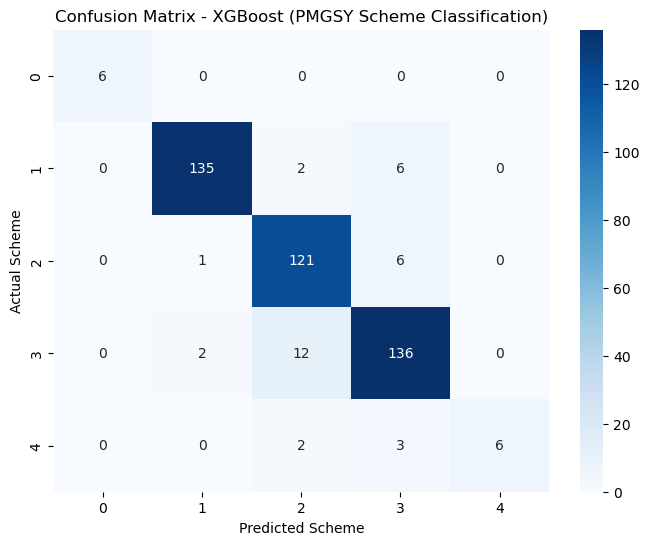

In [14]:
cm = confusion_matrix(y_test_c, y_pred_c)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_c),
            yticklabels=np.unique(y_test_c))
plt.xlabel("Predicted Scheme")
plt.ylabel("Actual Scheme")
plt.title("Confusion Matrix - XGBoost (PMGSY Scheme Classification)")
plt.show()

In [15]:
joblib.dump(clf, "pmgsy_xgb_clf_pipeline.pkl")

joblib.dump(le_scheme, "scheme_label_encoder.pkl")

['scheme_label_encoder.pkl']

In [16]:
df_reg=df.dropna(subset=["COST_OF_WORKS_SANCTIONED"]).copy()
y_reg=df_reg["COST_OF_WORKS_SANCTIONED"]
X_reg=df_reg.drop("COST_OF_WORKS_SANCTIONED", axis=1)

In [17]:
xgb_base = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [18]:
xgb_log = TransformedTargetRegressor(
    regressor=xgb_base,
    func=np.log1p,        
    inverse_func=np.expm1 
)

In [19]:
categorical_cols_reg = ["STATE_NAME", "DISTRICT_NAME", "PMGSY_SCHEME"]
numeric_cols_reg = [col for col in X_reg.columns if col not in categorical_cols_reg]
preprocessor_reg = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_cols_reg),
    ("cat", categorical_transformer, categorical_cols_reg)
])

In [20]:
reg=Pipeline(steps=[
    ("features",FeatureEngineer(is_regression=True)),
    ("preprocessor",preprocessor_reg),
    ("model",xgb_log)
])

In [21]:
X_train_r, X_test_r, y_train_r, y_test_r=train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)
reg.fit(X_train_r,y_train_r)

Pipeline(steps=[('features', FeatureEngineer(is_regression=True)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['NO_OF_ROAD_WORK_SANCTIONED',
                                                   'LENGTH_OF_ROAD_WORK_SANCTIONED',
                                                   'NO_OF_BRIDGES_SANCTIONED',
                                                   'NO_OF_ROAD_WORKS_COMPLETED',
                                                   'LENGTH_OF_ROAD_WORK_COMPLETED',
                                                   'NO_OF_BRIDGES_COMPLETED',
                                                   'EXPEND...
                                                                   feature_weights=None,
                                                                   gamma=None,
                                                                   grow_policy=None,
                                                                   importance_type=None,
                                                                   interaction_constraints=None,
                                                                   learning_rate=0.1,
                                                                   max_bin=None,
                                                                   max_cat_threshold=None,
                                                                   max_cat_to_onehot=None,
                                                                   max_delta_step=None,
                                                                   max_depth=6,
                                                                   max_leaves=None,
                                                                   min_child_weight=None,
                                                                   missing=nan,
                                                                   monotone_constraints=None,
                                                                   multi_strategy=None,
                                                                   n_estimators=300,
                                                                   n_jobs=None,
                                                                   num_parallel_tree=None, ...)))])

In [22]:
y_pred_r=reg.predict(X_test_r)
print("\nXGB Regression R2 score:",r2_score(y_test_r,y_pred_r))
print("meam absolute error:",mean_absolute_error(y_test_r,y_pred_r))


XGB Regression R2 score: 0.9822059370119173
meam absolute error: 15.017859483981546


In [23]:
joblib.dump(reg, "pmgsy_xgb_reg_pipeline.pkl")

['pmgsy_xgb_reg_pipeline.pkl']